In [1]:
# Import libraries and data
import os
import numpy as np
import pickle


from config.settings import ROOT_DIR, saved_models_path
from src.utils.linear_regressor import perform_linear_regression
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns



/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/test_set/lane_merging_merged_dif_test.csv


# Velocity model (4 parameters)
Here we solve the following model

$$\begin{align}
  v_i(k+1) &= \theta_{v_1}  v_i(k) + \theta_{v_2} v_i(k-1) + \theta_{v_3} v_i(k-2)   + \theta_{v_4} a_i(k)
\end{align}$$

## Data shifting


In [2]:
X_x = np.vstack((
    v_x[2:-1],        #v[k]   
    v_x[1:-2],        #v[k-1]
    v_x[ :-3],        #v[k-2]
    a_x[2:-1]         #a[k]
    )).T


y_x = v_x[3:]
print("A matrix: " + str(X_x.shape))
print("target matrix: " + str(np.array(y_x).shape))



A matrix: (205272, 4)
target matrix: (205272,)


In [3]:
X_y = np.vstack((
    v_x[2:-1],        #v[k]   
    v_x[1:-2],        #v[k-1]
    v_x[ :-3],        #v[k-2]
    a_x[2:-1]         #a[k]
    )).T


y_y = v_x[3:]
print("A matrix: " + str(X_y.shape))
print("target matrix: " + str(np.array(y_y).shape))



A matrix: (205272, 4)
target matrix: (205272,)


## Regression

Mean Squared Error (MSE): 5.8747e-01
Mean Absolute Error (MAE): 5.0341e-02
R-squared (R²) Score: 9.8873e-01
Coefficients:
0.9974184635673886
8.907093656779891e-05
-0.002366714566353755
0.04970769156989438


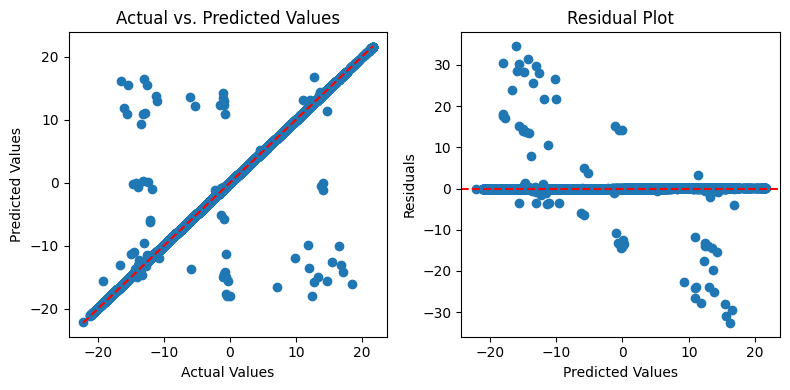

LinearRegression()

In [4]:
perform_linear_regression(X_x, y_x)

Mean Squared Error (MSE): 5.8747e-01
Mean Absolute Error (MAE): 5.0341e-02
R-squared (R²) Score: 9.8873e-01
Coefficients:
0.9974184635673886
8.907093656779891e-05
-0.002366714566353755
0.04970769156989438


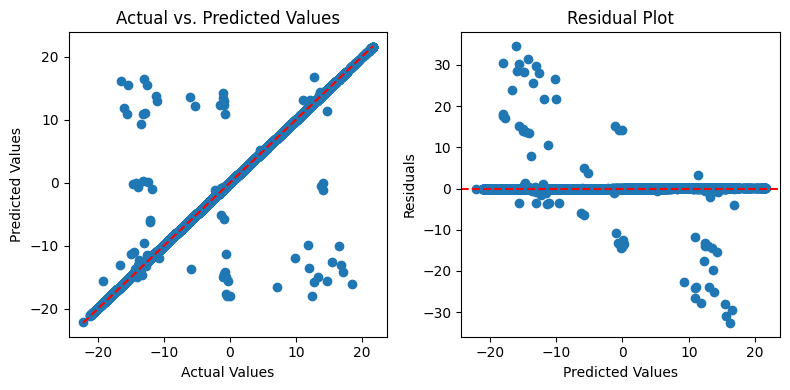

LinearRegression()

In [5]:
perform_linear_regression(X_y, y_y)